In [ ]:
from google.colab import files
dokumen = files.upload()

Saving Dataset_fix.zip to Dataset_fix.zip


In [ ]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np

In [ ]:
data = '/content/Dataset_fix.zip'
file_ekstrak = zipfile.ZipFile(data, 'r')
file_ekstrak.extractall()
file_ekstrak.close()

In [ ]:
direktori = '/content/Dataset_Semifix'
direktori_train = os.path.join(direktori, 'Train')
direktori_validation = os.path.join(direktori, 'Validation')
direktori_glaukoma_train = os.path.join(direktori_train, 'Glaukoma')
direktori_glaukoma_validation = os.path.join(direktori_validation, 'Glaukoma')
direktori_sehat_train = os.path.join(direktori_train, 'Sehat')
direktori_sehat_validation = os.path.join(direktori_validation, 'Sehat')
direktori_katarak_train = os.path.join(direktori_train, 'Katarak')
direktori_katarak_validation = os.path.join(direktori_validation, 'Katarak')

In [ ]:
print('total training sehat images:', len(os.listdir(direktori_sehat_train)))
print('total training glaukoma images:', len(os.listdir(direktori_glaukoma_train)))
print('total training katarak images:', len(os.listdir(direktori_katarak_train)))

total training sehat images: 460
total training glaukoma images: 233
total training katarak images: 140


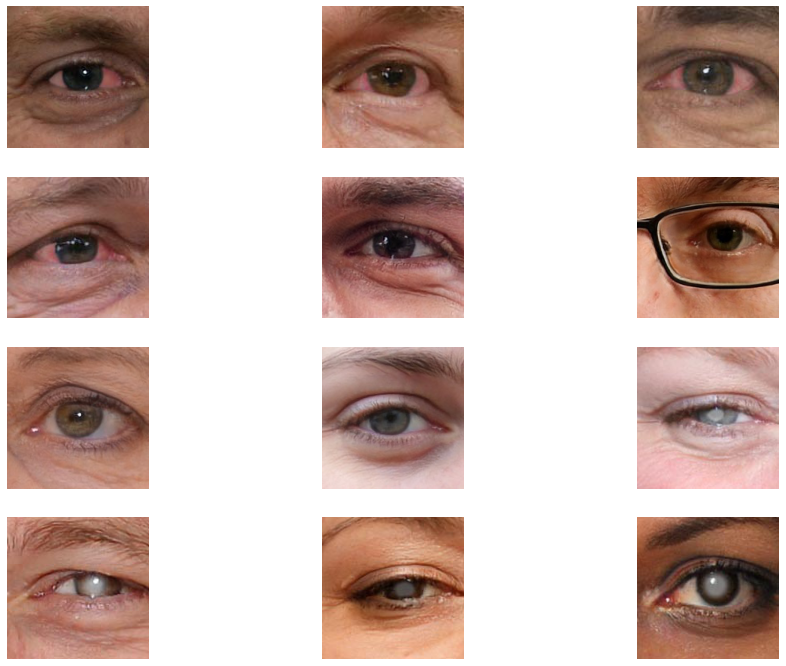

In [ ]:
kolom = 4
baris = 3
fig = plt.gcf()
fig.set_size_inches(kolom*4, baris*4)
next_pic = 0
next_pic += 4
next_sehat = [os.path.join(direktori_glaukoma_train, gambar) for gambar in os.listdir(direktori_glaukoma_train)[next_pic-4:next_pic]]
next_glaukoma = [os.path.join(direktori_sehat_train, gambar) for gambar in os.listdir(direktori_sehat_train)[next_pic-4:next_pic]]
next_katarak = [os.path.join(direktori_katarak_train, gambar) for gambar in os.listdir(direktori_katarak_train)[next_pic-4:next_pic]]
for i, image_path in enumerate(next_sehat + next_glaukoma + next_katarak):
  size = plt.subplot(kolom, baris, i+1)
  size.axis('off')
  img = mpimg.imread(image_path)
  plt.imshow(img)
plt.show()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Normalisasi Data
train_data_generator = ImageDataGenerator(rescale=1.0/255.0,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_data_generator.flow_from_directory(direktori_train,
                                                           batch_size=10,
                                                           class_mode='categorical',
                                                           target_size=(150,150))

test_generator = test_data_generator.flow_from_directory(direktori_validation,
                                                         batch_size=10,
                                                         class_mode='categorical',
                                                         target_size=(150,150))

Found 833 images belonging to 3 classes.
Found 281 images belonging to 3 classes.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=30,
            epochs=100,
            validation_data=test_generator,
            validation_steps=10,
            verbose=2
            )

Epoch 1/100
30/30 - 21s - loss: 0.9601 - accuracy: 0.5767 - val_loss: 0.9530 - val_accuracy: 0.5700 - 21s/epoch - 686ms/step
Epoch 2/100
30/30 - 20s - loss: 1.0052 - accuracy: 0.5700 - val_loss: 0.9436 - val_accuracy: 0.6200 - 20s/epoch - 650ms/step
Epoch 3/100
30/30 - 19s - loss: 1.0305 - accuracy: 0.5495 - val_loss: 0.9073 - val_accuracy: 0.6700 - 19s/epoch - 629ms/step
Epoch 4/100
30/30 - 20s - loss: 0.9754 - accuracy: 0.5700 - val_loss: 0.9701 - val_accuracy: 0.5400 - 20s/epoch - 655ms/step
Epoch 5/100
30/30 - 19s - loss: 0.9360 - accuracy: 0.6143 - val_loss: 0.9703 - val_accuracy: 0.5500 - 19s/epoch - 631ms/step
Epoch 6/100
30/30 - 19s - loss: 0.9338 - accuracy: 0.5427 - val_loss: 1.0478 - val_accuracy: 0.5600 - 19s/epoch - 631ms/step
Epoch 7/100
30/30 - 19s - loss: 1.0228 - accuracy: 0.5633 - val_loss: 0.9710 - val_accuracy: 0.5500 - 19s/epoch - 644ms/step
Epoch 8/100
30/30 - 19s - loss: 0.9604 - accuracy: 0.5833 - val_loss: 0.8935 - val_accuracy: 0.6100 - 19s/epoch - 643ms/step


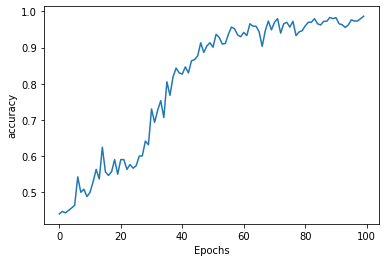

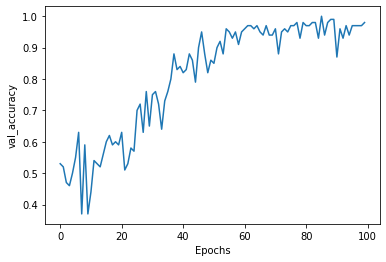

In [ ]:
def buat_grafik(history, string):
  plt.plot(history.history[string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show()
buat_grafik(history, 'accuracy')
buat_grafik(history, 'val_accuracy')

In [ ]:
from google.colab import files
unggahan = files.upload()

for i in unggahan.keys():
  path = '/content/' + i
  gmbr = image.load_img(path, target_size=(150,150))

  x=image.img_to_array(gmbr)
  x = x / 255
  x=np.expand_dims(x,axis=0)
  gambar = np.vstack([x])

  kelas = model.predict(gambar,batch_size=50)
  print(kelas)
  predicted = np.argmax(kelas)
  print(predicted)

Saving gambar6.png to gambar6.png
[[0.17408225 0.08988492 0.7360329 ]]
2


In [ ]:
#tf.keras.models.save_model(model, filepath='/content/1',format='h5')
model_name = 'Blood_Sugar_Classification.h5'
model.save(model_name, save_format='h5')